""

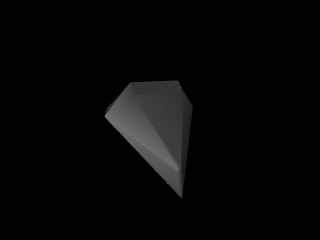

In [1]:
import mujoco
import mediapy as media

import visualize 
import simulation
import vehicle
import constants

orientation = [200, 150, 200]

world_xml = simulation.wrap_glider(
    *vehicle.create_glider_xml(
        orientation=orientation,
    )
)

model = mujoco.MjModel.from_xml_string(world_xml)
data = mujoco.MjData(model)

media.show_image(visualize.render_initial_pixels(model, data))

In [2]:
world_xml = simulation.drop_test_glider(
    *vehicle.create_glider_xml(
        orientation=orientation,
    )
)

model = mujoco.MjModel.from_xml_string(world_xml)
data = mujoco.MjData(model)

frames = visualize.render_to_collision(model, data, show=False)
media.show_video(frames)
print(len(frames)/constants.FRAMERATE)

4.016666666666667


In [3]:
from dataclasses import dataclass

@dataclass
class Result:
    distance: float
    x: int
    y: int
    z: int

    @property
    def orientation(self):
        return [self.x, self.y, self.z]






In [4]:
import simulation
import optimization
import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['x', 'y', 'z', 'distance'])

granularity = 50

distance_score = lambda x, y, z: optimization.measure_drop_test(orientation=[x,y,z])

# array = [
#     pd.DataFrame(
#         [[x, y, z, distance_score(x,y,z)]],
#         columns=['x', 'y', 'z', 'distance'],
#         ) 
#     for x in range(0,360, granularity)
#     for y in range(0,360, granularity)
#     for z in range(0, 360, granularity)
# ]

df = pd.concat(
    [
        pd.DataFrame(
            [[x, y, z, distance_score(x,y,z)]],
            columns=['x', 'y', 'z', 'distance'],
            ) 
        for x in range(0,360, granularity)
        for y in range(0,360, granularity)
        for z in range(0, 360, granularity)
    ],
    ignore_index=True,
)

print(df['distance'].max())
print(df[df['distance'] == df['distance'].max()])

0.9512907133812385
       x    y    z  distance
282  200  150  100  0.951291


In [5]:
# find largest 'distance' score that is a valid float in the dataframe

df.head()

,x,y,z,distance
0,0,0,0,0.003262
1,0,0,50,0.435943
2,0,0,100,0.557176
3,0,0,150,0.280348
4,0,0,200,0.196767


In [6]:
df['distance'].max()

# find the row with the greatest distance

df[df['distance'] == df['distance'].max()]


,x,y,z,distance
282,200,150,100,0.951291


In [7]:
# plot 3D graph

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mujoco
import visualize

with open 


In [1]:
import simulation
import vehicle

orientation = [200, 200, 100]
height = 800

with open(f"/Users/luan/Developer/glider/assets/worlds/{height}.xml", 'w') as f:
    f.write(simulation.drop_test_glider(
        *vehicle.create_glider_xml(
            orientation=orientation,
            scale=8
        ),
        height=height
    )
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3730216128.py, line 10)